# Probability simulations
## Ace of club wins
# Monty Hall problem

In [1]:
import random
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Ace of club wins

Consider the following card game with a wellshuffled
deck of cards. If you draw a red card, you win nothing. If you
get a spade, you win \$5. For any club, you win \$10 plus an extra \$20
for the ace of clubs.

* Create a probability model for the amount you win at this game.
* Find the expected winnings for a single game and the standard deviation of the winnings.

In [2]:
ncards  = 52
nred = 26
nsuit = 13

In [3]:
p_redcard = nred/ncards

p_spade = nsuit / ncards

#p_club_notace probability of picking a club but not an ace
p_club_notace = (nsuit - 1) / ncards

p_ace_club = 1 / ncards

In [4]:
prob_model = pd.Series(data=[p_redcard, p_spade, p_club_notace, p_ace_club], index = [0, 5, 10, 30])
prob_model

0     0.500000
5     0.250000
10    0.230769
30    0.019231
dtype: float64

In [5]:
# the sum of the probabilities of all possible events is 1
prob_model.sum()

1.0

In [6]:
# expected winnings
prizes = np.array([0, 5, 10, 30])
prob = np.array([p_redcard, p_spade, p_club_notace, p_ace_club])
E = prizes * prob
E = E.sum()
E

4.134615384615385

In [7]:
# standard deviation of the winnings
Var = np.sum(np.square(prizes - E) * prob)
SD = np.sqrt(Var)
SD

5.4350318311779153

### What is the maximum amount you would be willing to pay to play this game?
** If I had enough money to play this game many many times I would bet up to \$4.13, since if I bet any more I will lose money in the long run.**

## Simulation

In [8]:
def getcard():
    cardfaces = []
    suits = ['diamond', 'heart', 'spade','club']
    royals = ['J', 'Q', 'K', 'A']
    for i in range(2, 11):
        cardfaces.append(str(i))

    cardfaces = cardfaces + royals
    c = np.random.choice(cardfaces)
    s = np.random.choice(suits)
    card = c + ' of ' + s
    if s in['diamond', 'heart']:
        win = 0
    elif s == 'spade':
        win = 5
    elif card == 'A of club':
        win= 30
    else:
        win = 10
    return win

In [9]:
def simulate(nrep):
    prize = np.arange(nrep)
    for i in range(nrep):
        prize[i] = getcard()
    return prize

In [10]:
winnings = simulate(100000)

In [11]:
# probability model
unique, counts = np.unique(winnings, return_counts = True)
probability = counts / len(winnings)
probability_model = pd.Series(data=probability, index=unique)
probability_model

0     0.50051
5     0.24818
10    0.23203
30    0.01928
dtype: float64

In [12]:
# expected winnings
E = np.sum(winnings) / len(winnings)
E

4.1395999999999997

In [13]:
# standard deviation of the winnings
np.std(winnings)

5.4427209959725111

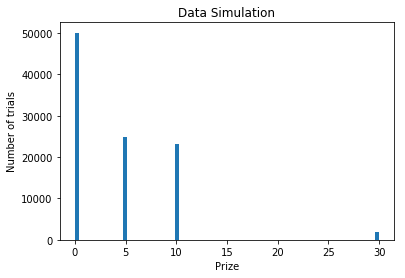

In [14]:
plt.hist(winnings, bins='auto')
plt.title("Data Simulation")
plt.ylabel('Number of trials')
plt.xlabel('Prize')
plt.show()

## Risk and preferences
** What is the maximum amount you would be willing to pay to play this game?** <br>
The expected prize is \$4.14 for a large number of trials but I do not have enough money to try so  many times. Since that, I would like to know the evolution of the expected prize with the number of trials.

In [15]:
n = 200
trials = range(1,n)
expected_prize = np.zeros(n)
for i in trials:
    winnings = simulate(i)
    e = np.sum(winnings) / len(winnings)
    expected_prize[i] = e

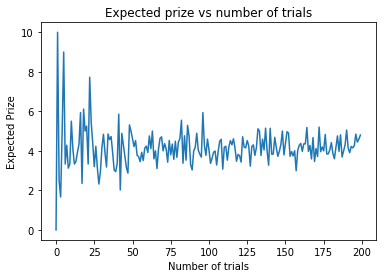

In [16]:
plt.plot(expected_prize)
plt.title("Expected prize vs number of trials")
plt.xlabel('Number of trials')
plt.ylabel('Expected Prize')
plt.show()

In [17]:
expected_prize[100]

4.0499999999999998

I am willing to pay 3.50 dollars to play this game because the expected prize for 100 trials (\$400) is aprox 4 dolar. 

# Monty Hall problem

In [18]:
ntrial= 10000

def stay():
    
    result = np.arange(ntrial)
    for i in range(ntrial):
        doors = ['1', '2', '3']
        car = random.choice(doors)
        choice = random.choice(doors)
        if car == choice:
            result[i] = 1
        else:
            result[i] = 0
    return result

def switch():
    
    result = np.arange(ntrial)
    for i in range(ntrial):
        doors = ['1', '2', '3']
        car = random.choice(doors)
        choice = random.choice(doors)
        
        if car == choice: 
            result[i] = 0 #because the player will change the door
        else:
            result[i] = 1 # if the car is not in the 1st door, 
                          # and we know it is not in the monty door, it will be in 3rd door.
    return result

In [19]:
stay_result = stay()
switch_result = switch()

In [20]:
unique, stay_counts = np.unique(stay_result, return_counts = True)
unique, switch_counts = np.unique(switch_result, return_counts = True)
pd.DataFrame(data=[stay_counts, switch_counts ], index=['Stay', 'Switch'], columns=['Lose', 'Win'])

,Lose,Win
Stay,6746,3254
Switch,3311,6689


In [21]:
stay_win = np.cumsum(stay_result)
switch_win = np.cumsum(switch_result)        

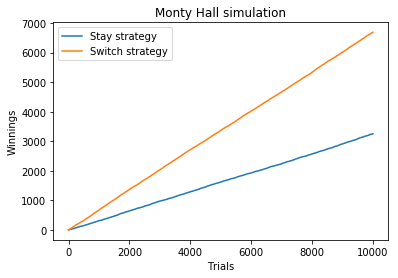

In [22]:
plt.plot(stay_win, label='Stay strategy')
plt.plot(switch_win, label='Switch strategy')
plt.title('Monty Hall simulation')
plt.xlabel('Trials')
plt.ylabel('Winnings')
plt.legend(loc='best')
plt.show()

In the Monty Hall simulation, we observe that the sum of winnings of the switch strategy is always greater than the stay strategy.<br>
Based on this, we can affirm that the switch strategy is the best option.